In [2]:
import requests
import pandas as pd

In [3]:
url = 'https://cov-spectrum.ethz.ch/api/resource/sample2'
params = {'country': 'Switzerland',
          'fields': 'date,region,country,division,ageGroup,sex,hospitalized,deceased,pangolinLineage'}
r = requests.get(url, params)
r.status_code

200

In [4]:
len(r.content)

5729888

In [5]:
df = pd.read_json(r.content)

In [6]:
# Unroll the count compression, one row per sample
df = df.loc[df.index.repeat(df['count'])]

<AxesSubplot:xlabel='date'>

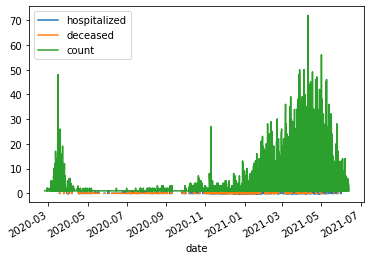

In [7]:
# Todo: Surveillance vs Non-Surveillance
df.plot('date',)

In [8]:
# Plots
# 1. Sequencing over time
# 2. Lineages over time
# 3.
# Need to create the views, resample by time or aggregate in some other way

df.describe()


,hospitalized,deceased,count
count,28081.000000,28081.000000,44515.000000
mean,0.030982,0.008867,5.282691
std,0.173271,0.093749,9.447486
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000
75%,0.000000,0.000000,4.000000
max,1.000000,1.000000,72.000000


In [9]:
df.columns

Index(['date', 'division', 'hospitalized', 'country', 'deceased',
       'pangolinLineage', 'sex', 'ageGroup', 'region', 'count'],
      dtype='object')

In [10]:
df.head()


,date,division,hospitalized,country,deceased,pangolinLineage,sex,ageGroup,region,count
0,2020-10-14,Basel-Stadt,NaN,Switzerland,NaN,B.1.258,Male,None,Europe,2
0,2020-10-14,Basel-Stadt,NaN,Switzerland,NaN,B.1.258,Male,None,Europe,2
1,2021-03-13,Solothurn,0.0,Switzerland,0.0,B.1.1.7,Female,70-79,Europe,1
2,2021-04-02,Aargau,0.0,Switzerland,0.0,B.1.1.7,Female,50-59,Europe,2
2,2021-04-02,Aargau,0.0,Switzerland,0.0,B.1.1.7,Female,50-59,Europe,2


In [11]:
df.pangolinLineage.value_counts()[0:60]

B.1.1.7       20265
B.1.177        2994
B.1.160        2636
B.1            1923
B.1.177.44     1430
B.1.1.39       1120
B.1.221        1077
B.1.1           989
B.1.160.16      897
B.1.258         745
B.1.258.17      562
B.1.1.70        495
B.1.160.14      438
B.1.177.43      396
B.1.160.26      343
B.1.177.23      291
B.1.36.1        245
B.1.214.2       240
B.1.160.30      240
B.1.36.35       228
B.1.416.1       217
B.1.351         206
B.1.160.29      192
B.1.236         192
B.1.160.32      184
B.1.160.15      184
B.1.160.11      173
B.1.160.12      152
B.1.1.519       143
P.1             137
C.36.3          135
C.35            132
B.1.617.2       132
B.1.177.81      129
B.1.160.20      125
B.1.160.22      125
B.1.160.10      117
B.1.1.318       114
B.1.160.31      107
B.1.160.9       105
B.1.177.71       98
B.1.1.277        97
B.1.367          96
B.1.146          86
B.1.619          82
B.1.1.189        76
B.1.177.28       71
B.1.1.47         70
B.1.177.62       70
C.16             69


In [12]:
df.dtypes

date               datetime64[ns]
division                   object
hospitalized              float64
country                    object
deceased                  float64
pangolinLineage            object
sex                        object
ageGroup                   object
region                     object
count                       int64
dtype: object

In [13]:
df.pangolinLineage.value_counts()['AY.1']

34